In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree
from matplotlib import pyplot as plt
import numpy as np
import math
import random

In [4]:
data = pd.read_csv("/content/drive/MyDrive/HUBIA/Decision Tree/agaricus-lepiota.data")
data

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Label Encoding

In [5]:
for feature in data.columns:
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])

data

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [6]:
x = data.drop(['r'],axis='columns')
y = data['r']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [7]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(x_train,y_train)

In [8]:
prediction = dtc.predict(x_test)

scores = cross_val_score(dtc, x_train, y_train, cv=10)
print("mean acc: ", scores.mean())

mean acc:  1.0


In [9]:
dtc.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [10]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       821
           1       1.00      1.00      1.00       804

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



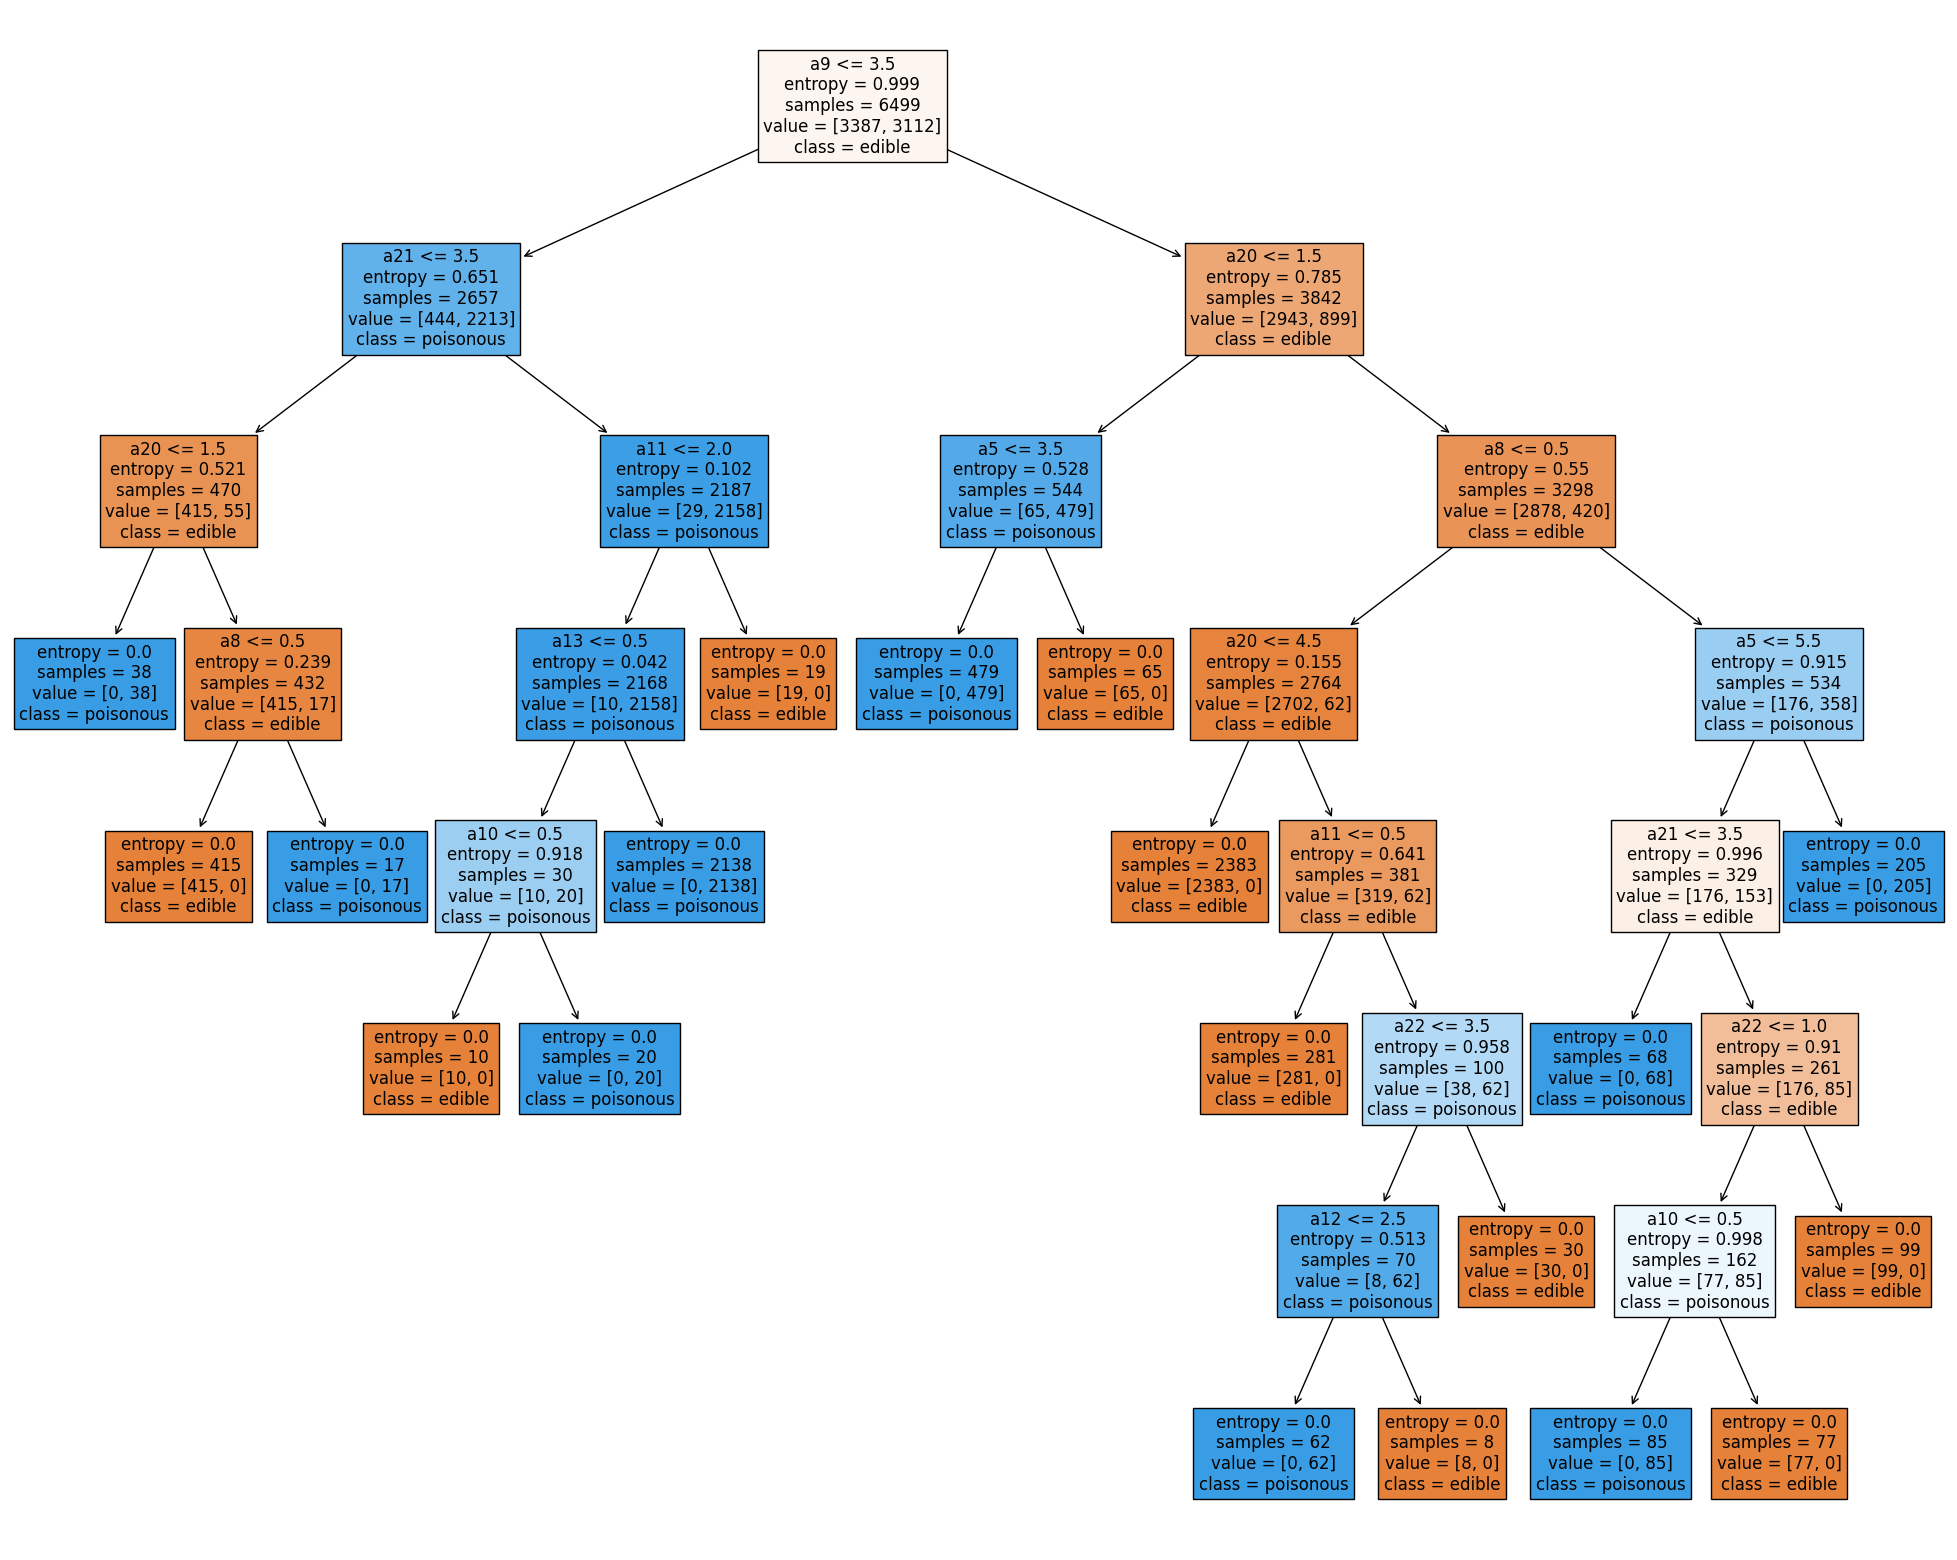

In [11]:
feature_names = x.columns

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dtc, feature_names=feature_names, class_names={1:'poisonous',0:'edible'},filled=True, fontsize=12)

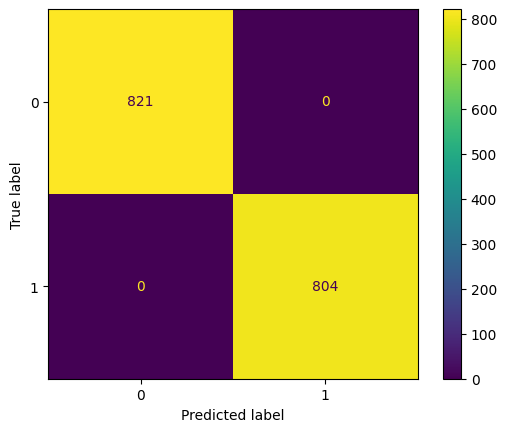

In [12]:
cm = confusion_matrix(y_test,prediction)
cm = ConfusionMatrixDisplay(cm)

cm.plot()
plt.show()

# One Hot Encoding

In [15]:
dataset = pd.read_csv("/content/drive/MyDrive/HUBIA/Decision Tree/agaricus-lepiota.data")

data_encoded=pd.get_dummies(data=dataset,drop_first=True)
data_encoded

,r_p,a1_c,a1_f,a1_k,a1_s,a1_x,a2_g,a2_s,a2_y,a3_c,...,a21_n,a21_s,a21_v,a21_y,a22_g,a22_l,a22_m,a22_p,a22_u,a22_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [16]:
x = data_encoded.drop(['r_p'],axis='columns')
y = data_encoded['r_p']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [17]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc = dtc.fit(x_train,y_train)

In [18]:
prediction = dtc.predict(x_test)

scores = cross_val_score(dtc, x_train, y_train, cv=10)
print("mean acc: ", scores.mean())

mean acc:  1.0


In [19]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2110
           1       1.00      1.00      1.00      1952

    accuracy                           1.00      4062
   macro avg       1.00      1.00      1.00      4062
weighted avg       1.00      1.00      1.00      4062



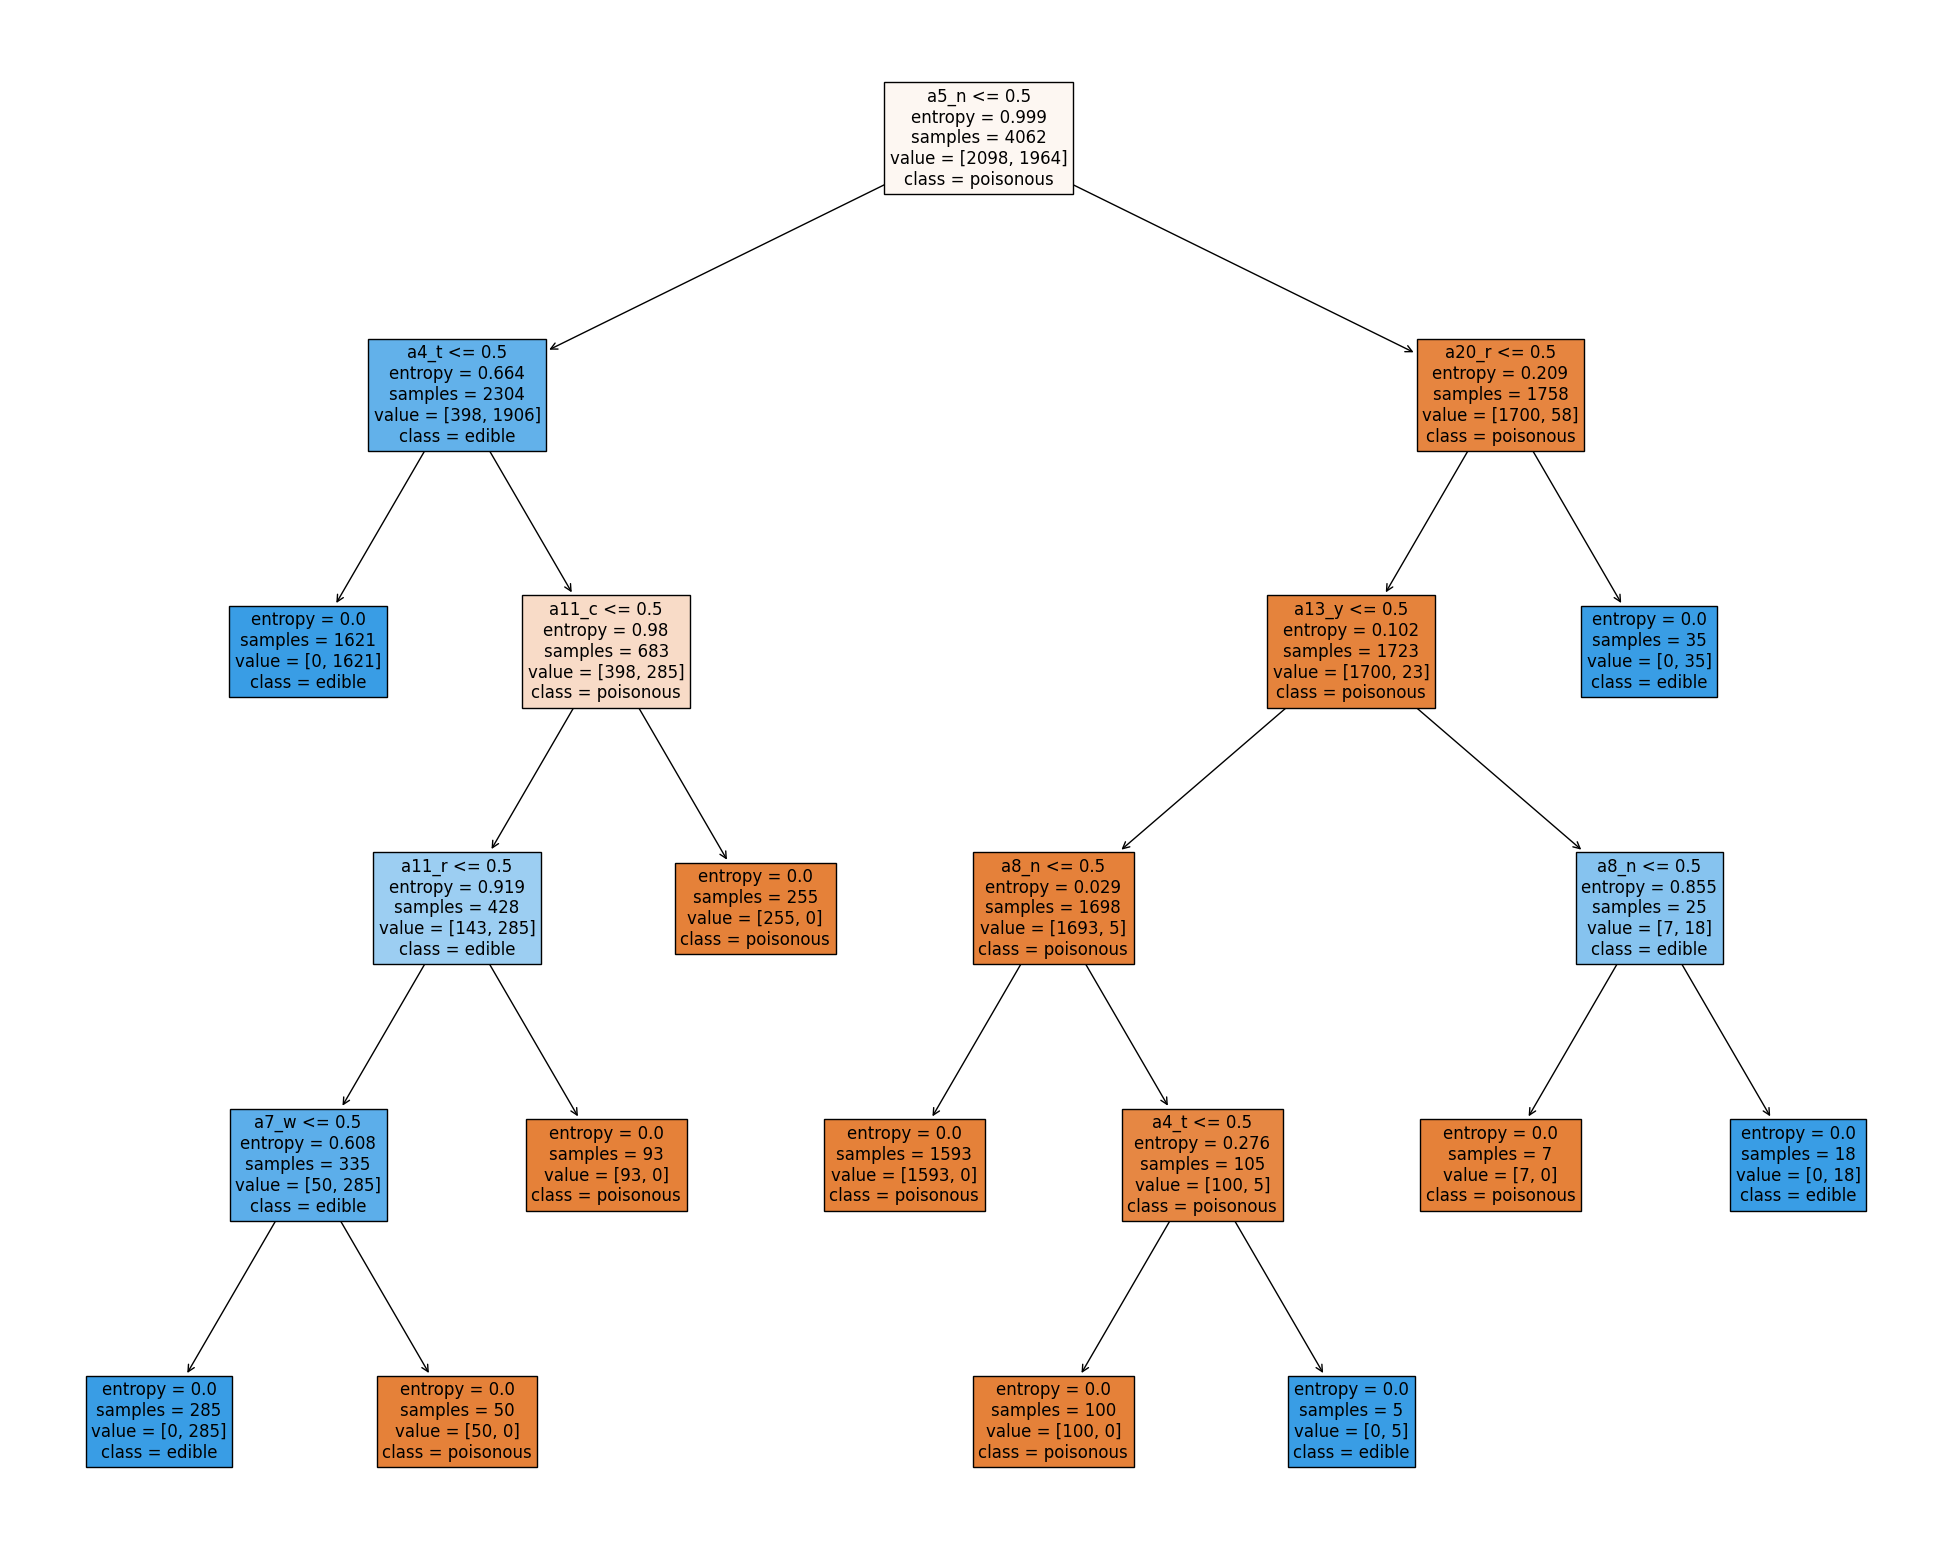

In [20]:
feature_names = x.columns

fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(dtc, feature_names=feature_names, class_names={1:'edible',0:'poisonous'},filled=True, fontsize=12)

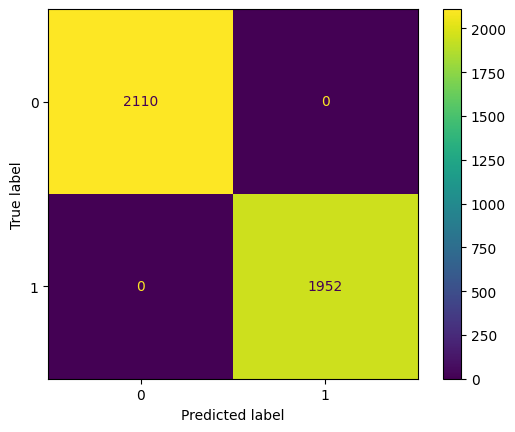

In [21]:
cm = confusion_matrix(y_test,prediction)
cm = ConfusionMatrixDisplay(cm)

cm.plot()
plt.show()

# Algoritmo ID3

In [82]:
class Atribute:
    name: str
    mode = None
    values: list
    next: dict = dict()

    def __init__(self, name, mode=None, values=None):
        self.name = name
        self.values = values
        self.mode = mode

    def add_next(self, value: str, next_atribute):
        self.next[value] = next_atribute

    def get_connections(self):
        return self.next

    def get_next(self, value: str):
        if value not in self.next.keys():
            return None
        return self.next[value]

    def set_mode(self, mode: str):
        self.mode = mode

    def get_name(self):
        return self.name

    def get_mode(self):
        return self.mode

    def get_values(self):
        return self.values

class DecisionTree:
    labels: list
    target: str
    n_labels: int
    root: Atribute
    features: list

    def __init__(self):
        self.features = []
        self.labels = []
        self.nodes = []
        self.root = None

    def information_gain(self, s: pd.DataFrame, atribute: str):
        values = s[atribute].unique()
        sum = 0
        for value in values:
            sv = s[s[atribute]==value]
            pv = len(sv) / len(s)
            ev = self.entropy(sv)
            sum = sum + pv*ev
        return self.entropy(s) - sum

    def entropy(self, s: pd.DataFrame):
        if len(s) == 0:
            return 0

        labels = s[self.target].unique()
        n_labels = len(labels)
        proba = []

        for label in labels:
            proba.append(len(s[s[self.target] == label]) / len(s))

        if 0 in proba or len(proba)==1:
            return 0
        else:
            entropy = 0
            for p in proba:
                entropy -= p*math.log(p, n_labels)

        return entropy

    def train_model(self, samples: pd.DataFrame, prev: Atribute, value: str):
        if samples[self.target].empty:
            if prev == None:
                return

            node = Atribute(name=prev.get_mode())
            node.add_next('class', None)

            prev.add_next(value, node)

            return

        if len(self.features) == 0 or samples[self.target].nunique() == 1:
            classification = samples[self.target].mode().loc[0]
            node = Atribute(name=classification)
            node.add_next('class', None)

            prev.add_next(value, node)

            return

        most_relevant = ['', -1]
        for atribute in self.features:
            name = atribute.get_name()
            gain = self.information_gain(samples, name)
            if gain > most_relevant[1]:
                most_relevant = [atribute, gain]

        atribute, gain = most_relevant
        atribute_mode = samples[self.target].mode().loc[0]

        node = Atribute(atribute.get_name(), mode=atribute_mode, values=atribute.get_values())

        self.features.remove(atribute)

        if prev != None:
            prev.add_next(value, node)
        else:
            self.root = node

        for value in node.get_values():
            subset = samples[samples[node.get_name()] == value]
            self.train_model(subset, node, value)

    def fit(self, train_samples: pd.DataFrame, target: str):
        self.target = target
        self.labels = list(train_samples[target].unique())
        self.n_labels = len(self.labels)

        for feature in train_samples.drop(columns=target).columns.tolist():
            values = train_samples[feature].unique()
            self.features.append(Atribute(feature, None, values))

        self.train_model(train_samples, None, None)

    def predict(self, samples: pd.DataFrame):
        predictions = []

        test_mode = samples[self.target].mode().loc[0]
        current_node = self.root
        predicted_label = ''

        for _, row in samples.iterrows():
            current_node = self.root
            while current_node != None:
                node_name = current_node.get_name()
                if node_name in self.labels:
                    predicted_label = node_name
                    break

                value = row[node_name]
                next_node = current_node.get_next(value)

                if next_node == None:
                    predicted_label = test_mode
                    break

                current_node = next_node
            predictions.append(str(predicted_label))

        return predictions

    def get_labels(self):
        return self.labels

In [78]:
dataset = pd.read_csv("/content/drive/MyDrive/HUBIA/Decision Tree/agaricus-lepiota.data")
dataset

,r,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a13,a14,a15,a16,a17,a18,a19,a20,a21,a22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [108]:
labels = dataset['r']
features = dataset.drop(columns='r')

train, test = train_test_split(dataset, test_size=0.2, stratify=dataset['r'], random_state=35)
val, test = train_test_split(test, test_size=0.5, stratify=test['r'], random_state=35)

#Treinamento

In [109]:
dtc = DecisionTree()
dtc.fit(train, 'r')

#Validação

In [110]:
y_pred = dtc.predict(val)
y_true = val['r']

print(len(np.where(y_pred != y_true)[0]))

14


#Teste

In [111]:
y_pred = dtc.predict(test)
y_true = test['r']

print(len(np.where(y_pred != y_true)[0]))

12


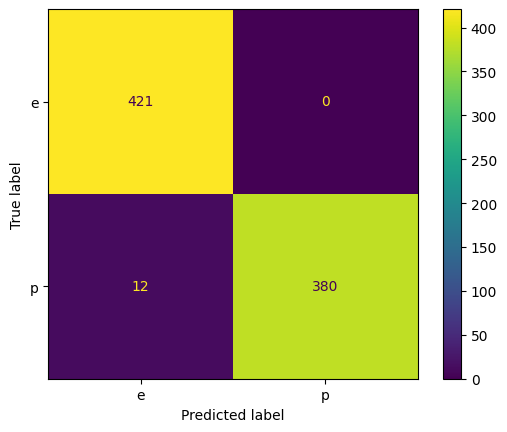

In [112]:
cm = confusion_matrix(y_true, y_pred)
cm = ConfusionMatrixDisplay(cm, display_labels=dtc.get_labels())

cm.plot()
plt.show()

In [113]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           e       0.97      1.00      0.99       421
           p       1.00      0.97      0.98       392

    accuracy                           0.99       813
   macro avg       0.99      0.98      0.99       813
weighted avg       0.99      0.99      0.99       813

